<a href="https://colab.research.google.com/github/namaws/Income-analysis-and-prediction/blob/mao/Data_analysis_and_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Intro to urban computing - Assignment 3
### Data Analysis


In [1]:
from google.colab import drive
import os
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
os.chdir('/content/drive/MyDrive/Fall_2022/Urban_computing/assignment_3')

In [229]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [151]:
col = ['age', 'workclass', 'fnlwgt', 'education', 'education-num','marital-statue','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country', 'income']
df = pd.read_csv('adult.data', names = col)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-statue,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [101]:
print(df.shape)

(32561, 15)


In [102]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-statue  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [117]:
df.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [104]:
df['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [105]:
df['income'].value_counts(normalize=True)

 <=50K    0.75919
 >50K     0.24081
Name: income, dtype: float64

In [106]:
#education number is actually the education after label encoding (but start from 1)
df[['education-num', 'education']].value_counts().reset_index().sort_values(by='education-num')

,education-num,education,0
15,1,Preschool,51
14,2,1st-4th,168
13,3,5th-6th,333
8,4,7th-8th,646
10,5,9th,514
7,6,10th,933
5,7,11th,1175
11,8,12th,433
0,9,HS-grad,10501
1,10,Some-college,7291


In [107]:
categories = list(df.drop(['income'], axis = 1).select_dtypes(include=['object']).columns)
print('category columns: ', categories)
numerous = list(df.select_dtypes(include=['uint8','int32','int64','float64']).columns)
print('numerous columns: ', numerous)

category columns:  ['workclass', 'education', 'marital-statue', 'occupation', 'relationship', 'race', 'sex', 'native-country']
numerous columns:  ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [108]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot(df, columns, type, label):
  plt.figure(figsize=(20,12))
  if type == 'countplot':
    count_plot(df, columns, label)
  elif type == 'histogram':
    histogram(df, columns, label)
  elif type == 'boxplot':
    box_plot(df, columns, label)

def count_plot(df, columns, label):
  for idx, var in enumerate(columns):
    plt.subplot(3,3, idx+1)
    g = sns.countplot(y=var, data=df, order=df[var].value_counts().index, hue=label)
  plt.tight_layout()

def box_plot(df, columns, label):
  for idx, var in enumerate(columns):
    plt.subplot(3,3, idx+1)
    g = sns.boxplot(x=var, data=df, showfliers=True, y=label)
  plt.tight_layout()

def histogram(df, columns, label):
  for idx, var in enumerate(columns):
    plt.subplot(3,3, idx+1)
    g = sns.histplot(x=var, data=df, hue=label)
  plt.tight_layout()

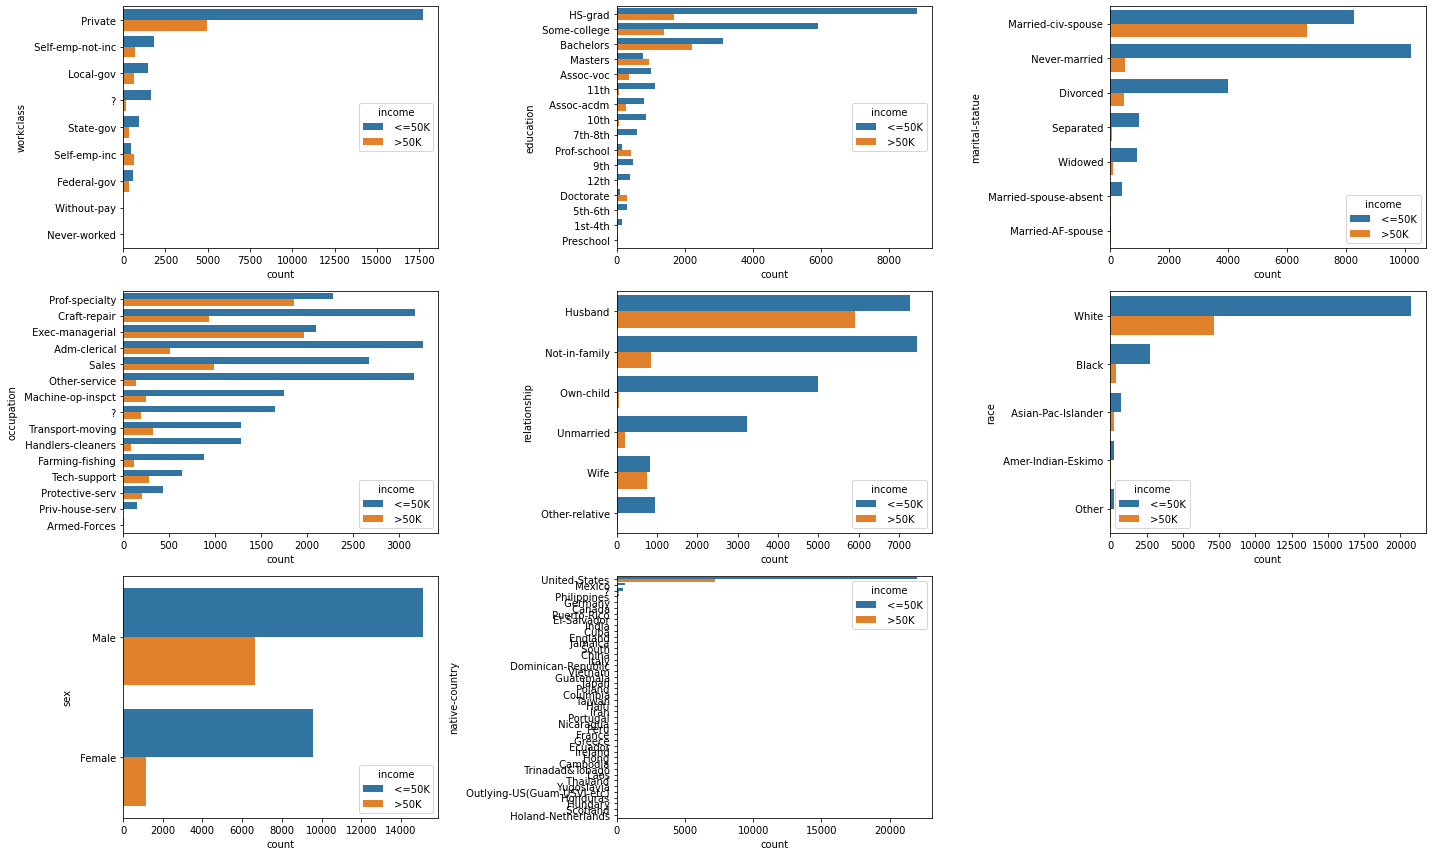

In [109]:
plot(df, categories, type='countplot', label='income')

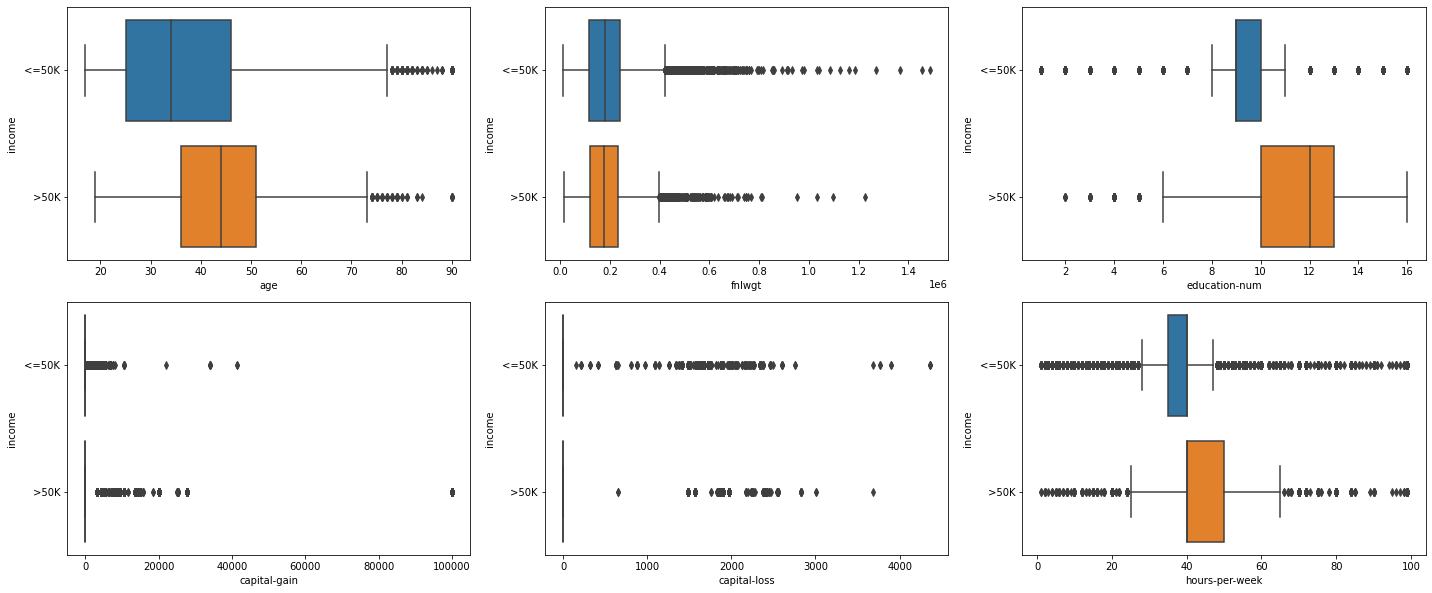

In [110]:
plot(df, numerous, type = 'boxplot', label='income')

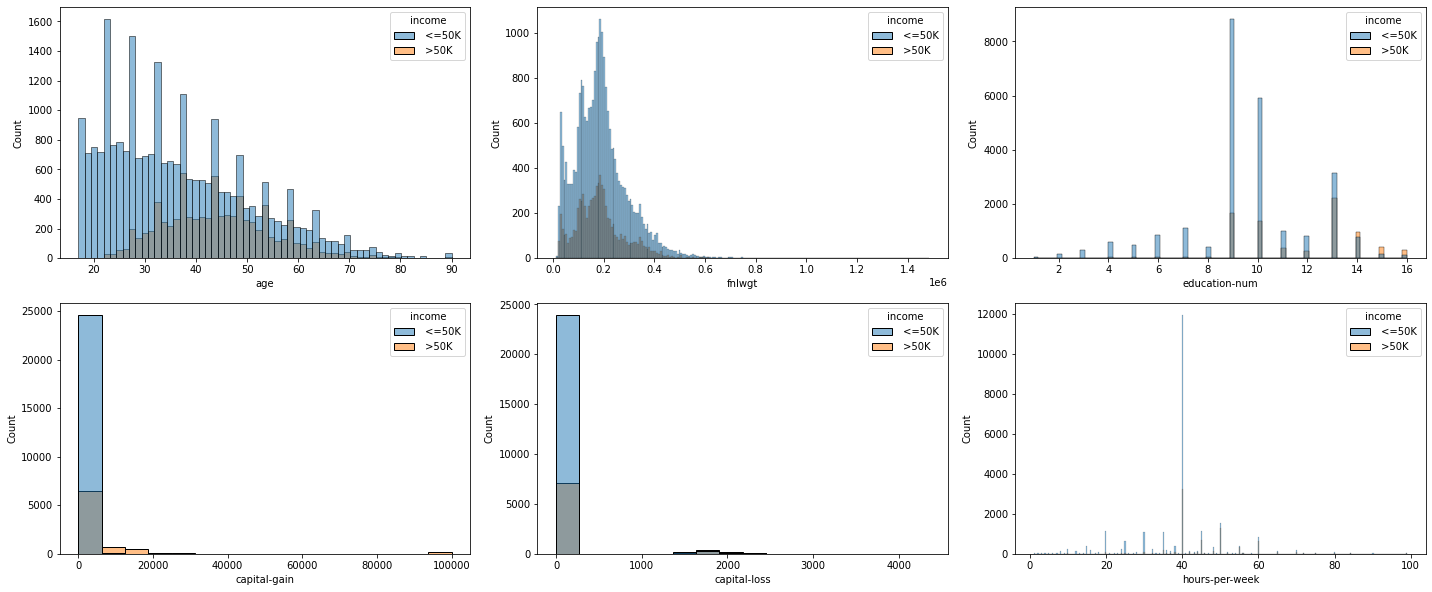

In [111]:
plot(df, numerous, type = 'histogram', label='income')

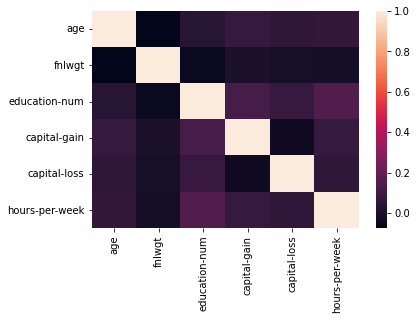

In [112]:
sns.heatmap(df.corr())

## Data Preprocessing

In [248]:
col = ['age', 'workclass', 'fnlwgt', 'education', 'education-num','marital-statue','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country', 'income']
df = pd.read_csv('adult.data', names = col)
dt = pd.read_csv('adult.test', names=col)
dt.drop(labels=0, inplace = True)

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-statue  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [250]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16281 entries, 1 to 16281
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             16281 non-null  object 
 1   workclass       16281 non-null  object 
 2   fnlwgt          16281 non-null  float64
 3   education       16281 non-null  object 
 4   education-num   16281 non-null  float64
 5   marital-statue  16281 non-null  object 
 6   occupation      16281 non-null  object 
 7   relationship    16281 non-null  object 
 8   race            16281 non-null  object 
 9   sex             16281 non-null  object 
 10  capital-gain    16281 non-null  float64
 11  capital-loss    16281 non-null  float64
 12  hours-per-week  16281 non-null  float64
 13  native-country  16281 non-null  object 
 14  income          16281 non-null  object 
dtypes: float64(5), object(10)
memory usage: 2.0+ MB


In [251]:
trans = list(df.select_dtypes(include=['int64']).columns)
df[trans] = df[trans].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  float64
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  float64
 3   education       32561 non-null  object 
 4   education-num   32561 non-null  float64
 5   marital-statue  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  float64
 11  capital-loss    32561 non-null  float64
 12  hours-per-week  32561 non-null  float64
 13  native-country  32561 non-null  object 
 14  income          32561 non-null  object 
dtypes: float64(6), object(9)
memory usage: 3.7+ MB


In [252]:
dt['age'] = dt['age'].astype('float64')
df = df.append(dt)

In [253]:
#drop fnlwgt -> final weight
#drop education -> basically the same as education num
df.drop(['fnlwgt','education'], axis = 1, inplace=True)

In [254]:
#labelencoding -> for categorical data column
def preprocessing(df, column):
  df = df.drop_duplicates()
  #check null and replace
  df = df.replace(' ?', np.NaN)
  df = df.fillna(df.mode().iloc[0])
  x = df.drop([column], axis=1)
  y = df[column]
  #onehot encoding
  x = pd.get_dummies(x)

  return x,y

In [255]:
x,y = preprocessing(df, 'income')

In [263]:
y = y.replace((' <=50K',' >50K'),(0,1))
y = y.replace((' <=50K.',' >50K.'),(0,1))

In [264]:
x_train = x.iloc[:int(0.8*len(x))]
x_test = x.iloc[int(-0.2*len(x)):]
y_train = y.iloc[:int(0.8*len(y))]
y_test = y.iloc[int(-0.2*len(y)):]

In [265]:
scaler = MinMaxScaler()

x_train_numeral = scaler.fit_transform(x_train.select_dtypes(['float', 'int64']))
x_train = pd.concat([pd.DataFrame(x_train_numeral, index=x_train.index, columns=x_train.columns[:5]), 
                       x_train.iloc[:, 5:]], axis=1)

x_test_numeral = scaler.transform(x_test.select_dtypes(['float', 'int64']))
x_test = pd.concat([pd.DataFrame(x_test_numeral, index=x_test.index, columns=x_test.columns[:5]),
                      x_test.iloc[:, 5:]], axis=1)

## Modeling
### KNN

In [291]:
neigh = KNeighborsClassifier(n_neighbors=5)
knn_model = neigh.fit(x_train,y_train)
knn_pred = knn_model.predict(x_test)

### Logistic Regression

In [270]:
lrc = LogisticRegression(solver='liblinear')
lrc_model = lrc.fit(x_train,y_train)
lrc_pred = lrc_model.predict(x_test)

### Decision Tree

In [274]:
dtr = DecisionTreeClassifier()
dtr_model = dtr.fit(x_train,y_train)
dtr_pred = dtr.predict(x_test)

In [272]:
knn_score = cross_val_score(neigh, x_train, y_train)

In [273]:
print(knn_score)

[0.79343385 0.79723827 0.80104269 0.79963365 0.80059188]


In [275]:
lrc_score = cross_val_score(lrc, x_train, y_train)
lrc_score

array([0.84289136, 0.84190503, 0.84486403, 0.84796393, 0.84258737])

In [277]:
dtr_score = cross_val_score(dtr, x_train, y_train)
dtr_score

array([0.80371988, 0.79921093, 0.80357898, 0.80865154, 0.82060316])

In [281]:
from sklearn.metrics import classification_report
labels = ['<=50', '>50']
print('\nClassification Report - KNN')
print(classification_report(y_test, knn_pred, target_names = labels))


Classification Report - KNN
              precision    recall  f1-score   support

        <=50       0.82      0.95      0.88      6741
         >50       0.70      0.35      0.46      2130

    accuracy                           0.81      8871
   macro avg       0.76      0.65      0.67      8871
weighted avg       0.79      0.81      0.78      8871



In [282]:
print('\nClassification Report - Logistic Regression')
print(classification_report(y_test, lrc_pred, target_names = labels))


Classification Report - Logistic Regression
              precision    recall  f1-score   support

        <=50       0.88      0.93      0.90      6741
         >50       0.72      0.60      0.65      2130

    accuracy                           0.85      8871
   macro avg       0.80      0.76      0.78      8871
weighted avg       0.84      0.85      0.84      8871



In [283]:
print('\nClassification Report - Decision Tree')
print(classification_report(y_test, dtr_pred, target_names = labels))


Classification Report - Decision Tree
              precision    recall  f1-score   support

        <=50       0.87      0.88      0.88      6741
         >50       0.62      0.60      0.61      2130

    accuracy                           0.81      8871
   macro avg       0.74      0.74      0.74      8871
weighted avg       0.81      0.81      0.81      8871



In [288]:
from sklearn.metrics import f1_score, recall_score, precision_score
print('F1 Score: %.3f' % f1_score(y_test, dtr_pred))
print('Recall: %.3f' % recall_score(y_test, dtr_pred))
print('Precision: %.3f' % precision_score(y_test, dtr_pred))

F1 Score: 0.607
Recall: 0.599
Precision: 0.616


In [289]:
print('F1 Score: %.3f' % f1_score(y_test, lrc_pred))
print('Recall: %.3f' % recall_score(y_test, lrc_pred))
print('Precision: %.3f' % precision_score(y_test, lrc_pred))

F1 Score: 0.655
Recall: 0.600
Precision: 0.721


In [292]:
print('F1 Score: %.3f' % f1_score(y_test, knn_pred))
print('Recall: %.3f' % recall_score(y_test, knn_pred))
print('Precision: %.3f' % precision_score(y_test, knn_pred))

F1 Score: 0.600
Recall: 0.562
Precision: 0.644
